# 1.1 Introducción al Machine Learning: Experimentando con activos

En este primer notebook vamos a descargar una serie de precios de activos con el fin de predecir, sin tener aún conocimientos de ningún algoritmo de aprendizaje automático, si las acciones de Apple van a subir o bajar a un mes vista.

¿Cómo lo haremos? Vamos a utilizar lo que hemos visto hasta ahora, que es encontrar patrones similares de comportamiento en las series temporales.

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import euclidean_distances

## Descarga de datos y preprocesamiento

In [ ]:
TICKERS = ["AAPL", "MSFT", "AMZN", "GOOGL", "JPM", "NVDA", "V", "UNH", "PG", "HD", "MA", "WMT", "BAC", "ADBE", "NFLX", "META", "TSLA", "JNJ", "WMT", "SPY"]
YEAR_START = 2013
START_DATE = str(YEAR_START)+"-01-01"
data = yf.download(TICKERS, start=START_DATE)
data.head()

[*********************100%%**********************]  19 of 19 completed


Price       Adj Close                                                      \
Ticker           AAPL       ADBE     AMZN       BAC      GOOGL         HD   
Date                                                                        
2013-01-02  16.747719  38.340000  12.8655  9.844126  18.099348  49.084457   
2013-01-03  16.536333  37.750000  12.9240  9.786849  18.109859  48.945274   
2013-01-04  16.075712  38.130001  12.9575  9.909594  18.467718  48.852489   
2013-01-07  15.981149  37.939999  13.4230  9.893227  18.387136  48.589588   
2013-01-08  16.024166  38.139999  13.3190  9.803212  18.350851  48.883404   

Price                                                   ...    Volume  \
Ticker            JNJ        JPM         MA       META  ...      META   
Date                                                    ...             
2013-01-02  51.974960  32.691410  47.666321  27.970324  ...  69846400   
2013-01-03  51.901581  32.625523  47.734501  27.740568  ...  63140600   
2013-01-04  52.495895  33.203815  47.732647  28.729517  ...  72715400   
2013-01-07  52.385818  33.240417  48.559822  29.388819  ...  83781800   
2013-01-08  52.393162  33.306290  48.399998  29.029200  ...  45871300   

Price                                                                   \
Ticker          MSFT      NFLX      NVDA       PG        SPY      TSLA   
Date                                                                     
2013-01-02  52899300  19431300  47883600  9987000  192059000  17922000   
2013-01-03  48294400  27912500  29888800  7741900  144761800  11130000   
2013-01-04  52521100  17761100  52496800  5853700  116817700  10110000   
2013-01-07  37110400  45550400  61073200  5269800  110002500   6630000   
2013-01-08  44703100  24714900  46642400  7362000  121265100  19260000   

Price                                     
Ticker           UNH         V       WMT  
Date                                      
2013-01-02   5358100  15826400  31172400  
2013-01-03  14413200  14937200  26730300  
2013-01-04  10458000  10376000  19314000  
2013-01-07   7804500  10242400  18604200  
2013-01-08   8196200  11800400  17600700  

[5 rows x 114 columns]

In [ ]:
precios = data["Adj Close"]
precios.head()

Ticker,AAPL,ADBE,AMZN,BAC,GOOGL,HD,JNJ,JPM,MA,META,MSFT,NFLX,NVDA,PG,SPY,TSLA,UNH,V,WMT
Date,,,,,,,,,,,,,,,,,,,
2013-01-02,16.747719,38.340000,12.8655,9.844126,18.099348,49.084457,51.974960,32.691410,47.666321,27.970324,22.532854,13.144286,2.935841,49.835762,119.121872,2.357333,45.892815,35.874557,18.145231
2013-01-03,16.536333,37.750000,12.9240,9.786849,18.109859,48.945274,51.901581,32.625523,47.734501,27.740568,22.230995,13.798571,2.938148,49.519737,118.852753,2.318000,43.747101,35.902256,18.029922
2013-01-04,16.075712,38.130001,12.9575,9.909594,18.467718,48.852489,52.495895,33.203815,47.732647,28.729517,21.814934,13.711429,3.035087,49.620289,119.374756,2.293333,43.831261,36.195488,18.098059
2013-01-07,15.981149,37.939999,13.4230,9.893227,18.387136,48.589588,52.385818,33.240417,48.559822,29.388819,21.774137,14.171429,2.947381,49.282734,119.048485,2.289333,43.831261,36.454067,17.925093
2013-01-08,16.024166,38.139999,13.3190,9.803212,18.350851,48.883404,52.393162,33.306290,48.399998,29.029200,21.659924,13.880000,2.882755,49.203724,118.705948,2.245333,43.250652,36.793461,17.974894


Recordad que, aunque no debemos descartar nunca la idea de trabajar con precios, en este caso concreto, para poder comparar activos debemos realizar nuestros cálculos con los retornos.

In [ ]:
retornos = np.log(precios).diff().dropna()
retornos.head()

Ticker,AAPL,ADBE,AMZN,BAC,GOOGL,HD,JNJ,JPM,MA,META,MSFT,NFLX,NVDA,PG,SPY,TSLA,UNH,V,WMT
Date,,,,,,,,,,,,,,,,,,,
2013-01-03,-0.012702,-0.015508,0.004537,-0.005835,0.000581,-0.002840,-0.001413,-0.002017,0.001429,-0.008248,-0.013487,0.048578,0.000786,-0.006362,-0.002262,-0.016826,-0.047883,0.000772,-0.006375
2013-01-04,-0.028250,0.010016,0.002589,0.012464,0.019568,-0.001897,0.011386,0.017570,-0.000039,0.035029,-0.018893,-0.006335,0.032460,0.002028,0.004382,-0.010699,0.001922,0.008134,0.003772
2013-01-07,-0.005900,-0.004995,0.035295,-0.001653,-0.004373,-0.005396,-0.002099,0.001102,0.017181,0.022689,-0.001872,0.032998,-0.029323,-0.006826,-0.002737,-0.001746,0.000000,0.007119,-0.009603
2013-01-08,0.002688,0.005258,-0.007778,-0.009140,-0.001975,0.006029,0.000140,0.001980,-0.003297,-0.012312,-0.005259,-0.020779,-0.022171,-0.001604,-0.002881,-0.019407,-0.013335,0.009267,0.002774
2013-01-09,-0.015753,0.013542,-0.000113,-0.046997,0.006552,-0.000791,0.004471,-0.000659,0.027749,0.051311,0.005634,-0.012949,-0.022673,0.005386,0.002539,-0.001188,0.018696,0.015133,-0.000292


## Definición de un patrón

Para poder encontrar patrones de comportamiento, lo primero que debemos hacer es definir un vector de características.

Tal y como hemos visto en las diapositivas, en el ejemplo de los peces, podíamos definir un vector al extraer el número de píxeles rojos o azules de una imagen de un pez para poder clasificar si eran sardinas o salmonetes.

En este caso, nuestro vector va a estar definido con los retornos del activo en un mes determinado. Hagamos un ejemplo:

Veamos el vector de características de Apple (AAPL) en el mes de octubre de 2021:

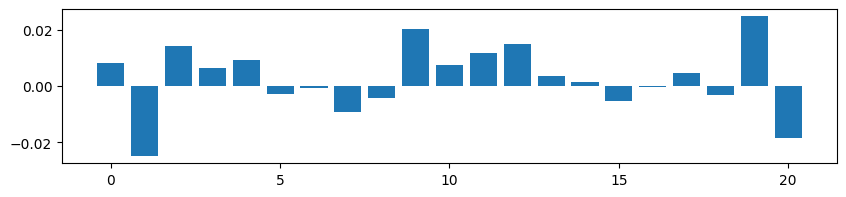

En el mes siguiente a este vector, Apple tuvo una rentabilidad del 9.99 %


In [ ]:
anno_base = 2021
mes_base = 10
fecha = str(anno_base) + "-" + str(mes_base)
fecha_target = str(anno_base) + "-" + str(mes_base+1)
base = retornos.AAPL[fecha].values
target = retornos.AAPL[fecha_target].sum()

plt.figure(figsize=(10,2))
plt.bar(range(len(base)), base.T)
plt.show()
print("En el mes siguiente a este vector, Apple tuvo una rentabilidad del", np.around(target*100, decimals=2), "%")

## Predicción

Una vez tenemos el vector de características `base`, nuestro objetivo es encontrar a lo largo del tiempo y de entre todos los activos que estamos estudiando, aquel vector que sea el más próximo con la siguiente hipótesis:

**Voy a asumir que aquel activo que más se parezca a mí hoy, se va a comportar como yo el mes que viene**

Por tanto, vamos a buscar el más cercano utilizando la distancia euclidea:

$$d = \sqrt{\sum_i^D (v_{i} - b_{i})^2}$$

In [ ]:
activo_mas_parecido = None
min_distancia = 9999

for anno in range(YEAR_START, anno_base+1):
  mes_max = mes_base if anno == anno_base else 13 ### OJO: Siempre tengo que buscar en el pasado para predecir bien
  for mes in range(1, mes_max):
    print("Buscando", anno, mes)
    fecha = str(anno) + "-" + str(mes)
    for activo in TICKERS:
      vector = retornos[activo][fecha].values
      dist = euclidean_distances(base[None, -19:], vector[None, -19:])[0][0] ### OJO: -19: porque no todos los meses tienen los mismos dias (cojo el minimo)
      if dist < min_distancia:
        print(" >", activo, anno, mes, dist)
        min_distancia = dist
        activo_mas_parecido = (activo, anno, mes)
activo_mas_parecido

Buscando 2013 1
 > AAPL 2013 1 0.1631409858397547
 > MSFT 2013 1 0.0630188434810775
 > JPM 2013 1 0.05347517248397526
 > HD 2013 1 0.04744849180049228
Buscando 2013 2
 > PG 2013 2 0.044108290293535544
Buscando 2013 3
Buscando 2013 4
Buscando 2013 5
 > SPY 2013 5 0.04039163829249785
Buscando 2013 6
Buscando 2013 7
Buscando 2013 8
Buscando 2013 9
Buscando 2013 10
Buscando 2013 11
Buscando 2013 12
Buscando 2014 1
Buscando 2014 2
Buscando 2014 3
Buscando 2014 4
Buscando 2014 5
Buscando 2014 6
 > MSFT 2014 6 0.03484993613008105
Buscando 2014 7
Buscando 2014 8
Buscando 2014 9
Buscando 2014 10
Buscando 2014 11
Buscando 2014 12
Buscando 2015 1
Buscando 2015 2
Buscando 2015 3
Buscando 2015 4
Buscando 2015 5
Buscando 2015 6
Buscando 2015 7
Buscando 2015 8
Buscando 2015 9
Buscando 2015 10
Buscando 2015 11
Buscando 2015 12
Buscando 2016 1
Buscando 2016 2
Buscando 2016 3
Buscando 2016 4
Buscando 2016 5
Buscando 2016 6
Buscando 2016 7
Buscando 2016 8
Buscando 2016 9
Buscando 2016 10
Buscando 2016 11

('MSFT', 2014, 6)

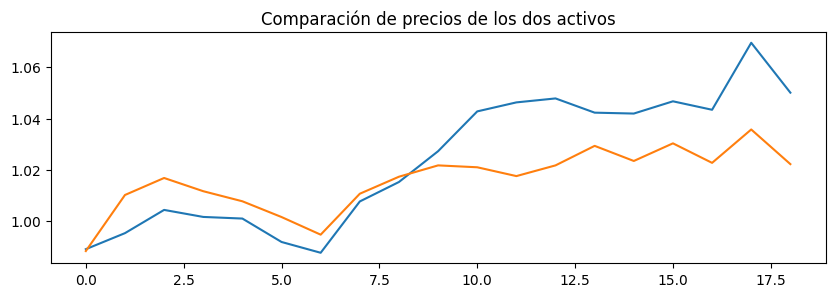

In [ ]:
plt.figure(figsize=(10, 3))
plt.title("Comparación de precios de los dos activos")
plt.plot(range(19), (precios.AAPL["2021-10"]/precios.AAPL["2021-10"].iloc[0])[-19:])
plt.plot(range(19), (precios.MSFT["2014-06"]/precios.MSFT["2014-06"].iloc[0])[-19:])
plt.show()

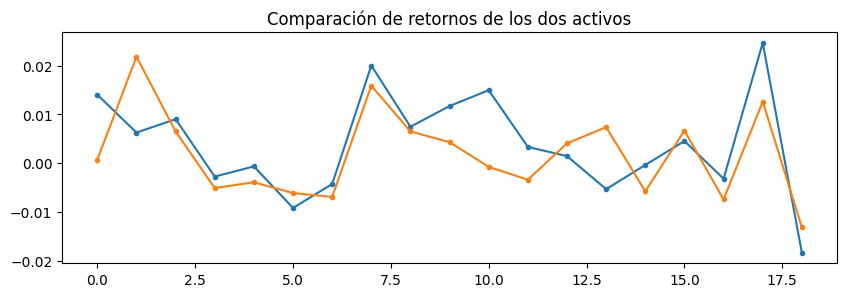

In [ ]:
plt.figure(figsize=(10, 3))
plt.title("Comparación de retornos de los dos activos")
plt.plot(range(19), (retornos.AAPL["2021-10"])[-19:], '.-')
plt.plot(range(19), (retornos.MSFT["2014-06"])[-19:], '.-')
plt.show()

Si el activo más parecido a Apple (AAPL) en octubre de 2021 es Microsoft (MSFT) en junio de 2014. Voy a asumir que Apple en noviembre de 2021 va a tener el mismo comportamiento que Microsoft en julio de 2014.

In [ ]:
print("Microsoft obtuvo una rentabilidad del", np.around(retornos.MSFT["2014-07"].sum() * 100, decimals=2), "%")
print("Pasado un mes, Apple tuvo una rentabilidad del", np.around(target*100, decimals=2), "%")
print(" > ERROR CUADRÁTICO:", np.around(np.sqrt((retornos.MSFT["2014-07"].sum() - target)**2)*100, decimals=2), "%")

Microsoft obtuvo una rentabilidad del 3.44 %
Pasado un mes, Apple tuvo una rentabilidad del 9.99 %
 > ERROR CUADRÁTICO: 6.55 %


## Construcción de nuestro algoritmo

Siguiendo la hipotesis de que **asumir que aquel activo que más se parezca a mí hoy, se va a comportar como yo el mes que viene** es cierto (hemos visto un ejemplo justo antes), vamos a intentar predecir el valor de Apple desde enero de 2020 hasta diciembre de 2023.

**Observación**: Recuerda que siempre hay que predecir a futuro con datos hasta la fecha, nunca podemos parecernos a alguien que aún no ha existido.

In [ ]:
ticker = "AAPL"

targets = []
targets_real = []
preds = []
preds_real = []
distancias = []
for anno_base in range(2020, 2024):
  for mes_base in range(1, 13):
    fecha_base = str(anno_base) + "-" + str(mes_base)
    base = retornos[ticker][fecha_base].values
    if mes_base == 12:
      fecha_base_target = str(anno_base+1) + "-01"
    else:
      fecha_base_target = str(anno_base) + "-" + str(mes_base+1)
    target = retornos[ticker][fecha_base_target].sum()
    targets.append(target>0)
    targets_real.append(target)


    activo_mas_parecido = None
    min_distancia = 9999

    for anno in range(YEAR_START, anno_base+1):
      mes_max = mes_base if anno == anno_base else 13 ### OJO: Siempre tengo que buscar en el pasado para predecir bien
      for mes in range(1, mes_max):
        fecha = str(anno) + "-" + str(mes)
        for activo in TICKERS:
          vector = retornos[activo][fecha].values
          dist = euclidean_distances(base[None, -19:], vector[None, -19:])[0][0]
          if dist < min_distancia:
            min_distancia = dist
            activo_mas_parecido = (activo, anno, mes)
    if activo_mas_parecido[2] == 12:
      fecha_pred = str(activo_mas_parecido[1]+1) + "-01"
    else:
      fecha_pred = str(activo_mas_parecido[1]) + "-" + str(activo_mas_parecido[2]+1)
    print(anno_base, mes_base, activo_mas_parecido, min_distancia)
    pred = retornos[activo_mas_parecido[0]][fecha_pred].sum()
    preds.append(pred>0)
    preds_real.append(pred)
    distancias.append(min_distancia)

2020 1 ('AMZN', 2017, 7) 0.0582984801908718
2020 2 ('META', 2020, 1) 0.08746080339520358
2020 3 ('NVDA', 2018, 2) 0.23070993470071077
2020 4 ('NVDA', 2013, 4) 0.10016452784695379
2020 5 ('GOOGL', 2013, 9) 0.03628236914415709
2020 6 ('JPM', 2014, 6) 0.07642146561480931
2020 7 ('AMZN', 2016, 4) 0.07416630160514023
2020 8 ('BAC', 2014, 8) 0.07261184435428021
2020 9 ('TSLA', 2019, 3) 0.11883642225205876
2020 10 ('NFLX', 2014, 2) 0.09621151549582613
2020 11 ('JPM', 2019, 12) 0.06168793656000543
2020 12 ('MSFT', 2016, 9) 0.05765064417906589
2021 1 ('TSLA', 2013, 1) 0.08400073424141787
2021 2 ('AAPL', 2013, 6) 0.04950056535990275
2021 3 ('JPM', 2015, 9) 0.06633324475746788
2021 4 ('PG', 2020, 1) 0.04561668684557759
2021 5 ('JNJ', 2014, 3) 0.05637475492157809
2021 6 ('JNJ', 2019, 12) 0.032951394342862976
2021 7 ('ADBE', 2015, 4) 0.049647443178979615
2021 8 ('JPM', 2015, 4) 0.04182267816772413
2021 9 ('UNH', 2018, 9) 0.050483823366866014
2021 10 ('MSFT', 2014, 6) 0.03484993613008105
2021 11 ('U

In [ ]:
preds = np.array(preds)
targets = np.array(targets)
preds_real = np.array(preds_real)
targets_real = np.array(targets_real)
distancias = np.array(distancias)

Veamos ahora qué resultados obtenemos con nuestra estrategia. Calculemos el accuracy (porcentaje de acierto) y el error promedio de la predicción.

In [ ]:
print(" > ACCURACY:", np.mean(preds == targets))

 > ACCURACY: 0.6458333333333334


In [ ]:
error = np.sqrt((preds_real - targets_real)**2)
print(" > ERROR CUADRÁTICO PROMEDIO:", np.around(np.mean(error)*100, decimals=2), "% +-", np.around(np.std(error)*100, decimals=2), "%")

 > ERROR CUADRÁTICO PROMEDIO: 7.79 % +- 6.34 %


Hagamos una sencilla simulación, asumiendo que no hay gastos de gestión.

- Cuando predecimos que va a subir, invertimos todo nuestro dinero en Apple.

- Cuando predecimos que va a bajar, vendemos todas nuestras acciones de Apple.

In [ ]:
DINERO_INI = 1000
dinero = DINERO_INI
for pred, target in zip(preds, targets_real):
  if pred == True: # Va a subir
    dinero = dinero + dinero * target
  else: # Va a bajar
    dinero = dinero
print(dinero)

2750.93104464677


In [ ]:
rent = (dinero - DINERO_INI) / DINERO_INI * 100
print(" > Rentabilidad a cuatro años:", np.around(rent, decimals=2), "%")
print(" > Rentabilidad anual:", np.around(rent/4, decimals=2), "%")

 > Rentabilidad a cuatro años: 175.09 %
 > Rentabilidad anual: 43.77 %


Si comparamos con invertir el dinero en Apple en enero del 2020 y dejarlo ahí durante 4 años:

In [ ]:
DINERO_INI = 1000
dinero = DINERO_INI
for target in retornos[ticker].resample("M").sum()["2020":"2023"]:
  dinero = dinero + dinero * target
print(dinero)

2237.9804451205814


In [ ]:
rent = (dinero - DINERO_INI) / DINERO_INI * 100
print(" > Rentabilidad a cuatro años:", np.around(rent, decimals=2), "%")
print(" > Rentabilidad anual:", np.around(rent/4, decimals=2), "%")

 > Rentabilidad a cuatro años: 123.8 %
 > Rentabilidad anual: 30.95 %


**DISCUSIÓN DE LOS RESULTADOS**

- No se tienen en cuenta costes de transacción.

- Irte a 100% liquidez implica tener en cuenta otros parámetros, como la inflación, etc.

- No hay diversificación. Hay muchísimo riesgo.

¿Qué más podríamos decir?